### Importing Libraries

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow import keras
import tensorflow as tf
import numpy as np
import os

#### Adjusting the images in 'datagen'
#### Generating variables and adding paths for images present in Train, Validation & Test Dataset 

In [2]:
IMAGE_SIZE=400
CHANNELS=3

train_datagen = ImageDataGenerator(
    rescale = 1./399,
    horizontal_flip = True,
    rotation_range = 10
)

train_generator = train_datagen.flow_from_directory(
    'data_dir/train', 
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse',
)

Found 2100 images belonging to 3 classes.


In [3]:
train_generator.class_indices

{'Buffalo': 0, 'Elephant': 1, 'Rhino': 2}

In [4]:
class_names = list(train_generator.class_indices.keys())
class_names

['Buffalo', 'Elephant', 'Rhino']

In [5]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.2910876  0.21804512 0.16386294]
  [0.29764426 0.21995    0.16827089]
  [0.29885343 0.2211592  0.17008467]
  ...
  [0.27267718 0.19247669 0.16490777]
  [0.2739491  0.1937486  0.16617967]
  [0.27522096 0.19502045 0.16745153]]

 [[0.29070604 0.21804512 0.16373575]
  [0.29738986 0.21969564 0.16788931]
  [0.29910782 0.22141358 0.17046621]
  ...
  [0.30399024 0.22378974 0.19622082]
  [0.3064068  0.2262063  0.19863738]
  [0.3088234  0.2286229  0.20105398]]

 [[0.29032448 0.21804512 0.16360858]
  [0.2971355  0.21944125 0.16750775]
  [0.29936218 0.22166795 0.17084779]
  ...
  [0.3418201  0.26022992 0.23335582]
  [0.342456   0.26061147 0.23386458]
  [0.34309196 0.26099303 0.23437333]]

 ...

 [[0.3176879  0.2374874  0.20802005]
  [0.31743354 0.23723304 0.20802005]
  [0.31717917 0.23697866 0.20802005]
  ...
  [0.24782307 0.17055057 0.14437133]
  [0.20916419 0.1375926  0.11002367]
  [0.21965453 0.14947908 0.12191016]]

 [[0.28937462 0.21228176 0.18471284]
  [0.28721243 0.21037394 0.18280502]


In [6]:
validation_datagen = ImageDataGenerator(
    rescale = 1./399,
    horizontal_flip = True,
    rotation_range = 10
)

validation_generator = train_datagen.flow_from_directory(
    'data_dir/validation', 
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse',
)

Found 300 images belonging to 3 classes.


In [7]:
test_datagen = ImageDataGenerator(
    rescale = 1./399,
    horizontal_flip = True,
    rotation_range = 10
)

test_generator = train_datagen.flow_from_directory(
    'data_dir/testing', 
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse'
)

Found 600 images belonging to 3 classes.


In [8]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.06609889 0.07361769 0.02986375]
  [0.05687135 0.06439015 0.02178363]
  [0.07053229 0.06842956 0.03352027]
  ...
  [0.10025062 0.06766918 0.04761905]
  [0.10025062 0.06766918 0.04761905]
  [0.10025062 0.06766918 0.04761905]]

 [[0.06696139 0.07448019 0.03043876]
  [0.0573026  0.06482139 0.02221488]
  [0.06938228 0.0679983  0.03251401]
  ...
  [0.09860969 0.06438731 0.04269626]
  [0.09846595 0.06409981 0.04226501]
  [0.0983222  0.06381231 0.04183375]]

 [[0.0678239  0.0753427  0.03101376]
  [0.05773385 0.06525265 0.02264613]
  [0.06823228 0.06756705 0.03150775]
  ...
  [0.09447075 0.05938303 0.03355303]
  [0.09418325 0.05909553 0.03297803]
  [0.09389575 0.05880803 0.03240303]]

 ...

 [[0.32044515 0.24275091 0.16505668]
  [0.32159516 0.24390092 0.16620669]
  [0.32274517 0.24505094 0.1673567 ]
  ...
  [0.3626412  0.2799344  0.20224018]
  [0.3659148  0.283208   0.20551379]
  [0.3702208  0.28751406 0.20981984]]

 [[0.3410401  0.26334587 0.18565165]
  [0.34233388 0.26463962 0.18694538]


### Building the Model (Layering done in Sequential Model)

In [9]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS) 
n_classes=3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

### Summarizing the model

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 398, 398, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 199, 199, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 197, 197, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 98, 98, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 64)       0

### Compiling the Model
#### We use Adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [11]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [12]:
2100/32

65.625

In [13]:
300/32

9.375

### Training the model to determine the accuracy of the model

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch = 65,
    batch_size = 32,
    validation_data = validation_generator,
    validation_steps = 9,
    verbose = 1,
    epochs = 20

)

Epoch 1/20
65/65 [==============================] - 343s 5s/step - loss: 1.0963 - accuracy: 0.3491 - val_loss: 1.0460 - val_accuracy: 0.5069
Epoch 2/20
65/65 [==============================] - 333s 5s/step - loss: 0.9581 - accuracy: 0.5498 - val_loss: 0.9038 - val_accuracy: 0.5417
Epoch 3/20
65/65 [==============================] - 327s 5s/step - loss: 0.8938 - accuracy: 0.5885 - val_loss: 0.8000 - val_accuracy: 0.6458
Epoch 4/20
65/65 [==============================] - 338s 5s/step - loss: 0.8186 - accuracy: 0.6354 - val_loss: 0.7403 - val_accuracy: 0.6875
Epoch 5/20
65/65 [==============================] - 323s 5s/step - loss: 0.7651 - accuracy: 0.6630 - val_loss: 0.6852 - val_accuracy: 0.7153
Epoch 6/20
65/65 [==============================] - 328s 5s/step - loss: 0.7251 - accuracy: 0.6910 - val_loss: 0.6379 - val_accuracy: 0.7500
Epoch 7/20
65/65 [==============================] - 502s 8s/step - loss: 0.6928 - accuracy: 0.7113 - val_loss: 0.6650 - val_accuracy: 0.7292
Epoch 8/20
65

### Calculating the accuracy of the test dataset with trained model

In [15]:
scores = model.evaluate(test_generator)

19/19 [==============================] - 38s 2s/step - loss: 0.5167 - accuracy: 0.8167


In [16]:
scores

[0.5167426466941833, 0.8166666626930237]

In [17]:
history

In [18]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 65}

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

##### loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch

In [20]:
type(history.history['loss'])

list

In [21]:
len(history.history['loss'])

20

In [22]:
history.history['loss'][:5]

[1.0963126420974731,
 0.9581048488616943,
 0.8937572836875916,
 0.8186225891113281,
 0.765128493309021]

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [24]:
val_acc

[0.5069444179534912,
 0.5416666865348816,
 0.6458333134651184,
 0.6875,
 0.7152777910232544,
 0.75,
 0.7291666865348816,
 0.7604166865348816,
 0.7743055820465088,
 0.7986111044883728,
 0.7916666865348816,
 0.78125,
 0.8020833134651184,
 0.8472222089767456,
 0.8159722089767456,
 0.8229166865348816,
 0.8055555820465088,
 0.7638888955116272,
 0.8055555820465088,
 0.8055555820465088]

In [25]:
acc

[0.3491295874118805,
 0.5498065948486328,
 0.5884913206100464,
 0.6353965401649475,
 0.6629593968391418,
 0.6910058259963989,
 0.7113152742385864,
 0.7470986247062683,
 0.7649903297424316,
 0.7703094482421875,
 0.7819148898124695,
 0.8128626942634583,
 0.8191489577293396,
 0.8360735177993774,
 0.8413926362991333,
 0.853965163230896,
 0.8602514266967773,
 0.8713732957839966,
 0.9013539552688599,
 0.9018375277519226]

### Plotting the Accuracy and Loss Curves

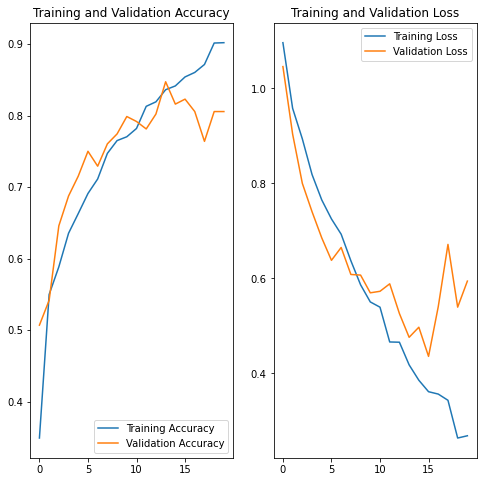

In [26]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Rhino
1/1 [==============================] - 1s 1s/step
predicted label: Rhino


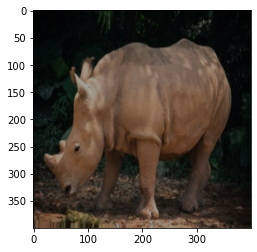

In [31]:
import numpy as np


for images_batch, labels_batch in test_generator:
    first_image = images_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Function for inference

In [28]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

#### Running inference on few sample images and  
#### Displaying images with the ground truth

1/1 [==============================] - 0s 74ms/step


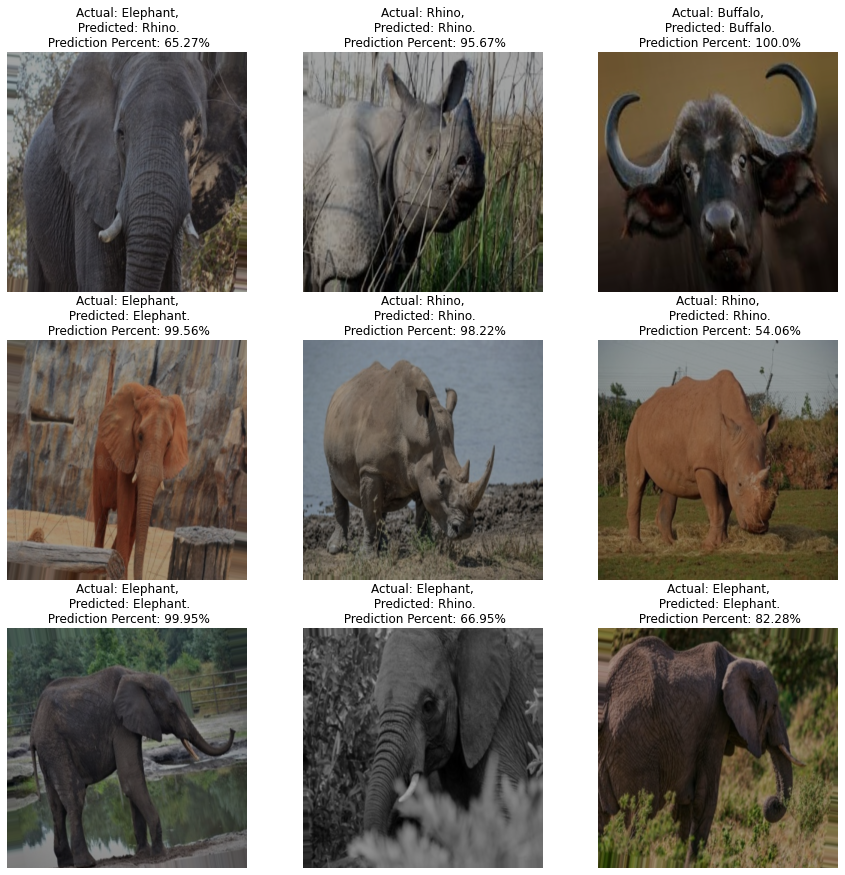

In [29]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Prediction Percent: {confidence}%")
        
        plt.axis("off")
    break